In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
#| default_exp utils

# End-to-End-notebook


Predictive Maintenance (PdM) is a great application of Survival Analysis since it consists in predicting when equipment failure will occur and therefore alerting the maintenance team to prevent that failure.

### ` Objectives`
> - To estimate Remaining Useful Time(RUL) of a machine/component
> - To Predict Probability of Failure in Next N days
> - Create a Dashboard for tracking and alerts

# Setup
> Requirements

### `Requirements`
> To automatically generate requirements.txt file type `pipreqs .` in terminal
> - matplotlib==3.7.1
> - numpy==1.24.2
> - pandas==2.0.1
> - setuptools==65.6.3 

# Dataset

> Dataset we are going to use 

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
import pandas as pd
import numpy as np

from PredictiveMaintenance2 import Datasets,Visualize,FeatureEng,Model

### load dataset

In [ ]:
file = 'predictive_maintenance_dataset.csv'
machine_data = Datasets.load_dataset(file,'r')
machine_data.head()

File exists
.csv file extension is supported


,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,01-01-2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,01-01-2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,01-01-2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,01-01-2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,01-01-2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


### Explore dataset
- dataset.shape
- dataset.null values
- dataset.duplicate rows

In [ ]:
Datasets.explore_dataset(dataset_df = machine_data,
                         NAN_action='drop',
                         duplicate_action = 'drop',
                         duplicate_subset=['device', 'date'])

In Dataset 
Observations : 124494 
Columns :12

-----NAN values-----
date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64

-----Duplicate records-----
1

drop Duplicates successful 



In [ ]:
machine_data.dtypes

date       object
device     object
failure     int64
metric1     int64
metric2     int64
metric3     int64
metric4     int64
metric5     int64
metric6     int64
metric7     int64
metric8     int64
metric9     int64
dtype: object

In [ ]:
#feature function  - explain every feature
FeatureEng.explain_features(dataset_df = machine_data,
                            machine_Unique_Identifer = 'device',
                            observation_date = 'date',
                            failure = 'failure',
                            sensor_values = ['metric1','metric2'])

There are 1169 unique machines

Observations are recorded for 304 days

 First 5 unique dates are 
Index(['01-01-2015', '01-02-2015', '01-03-2015', '01-04-2015', '01-05-2015'], dtype='object', name='date')

Number of records where, 
Failure = FALSE are 124387 
Failure = TRUE are 106

Percentage of failures : 0.085%

--Warning---: 
Number of record of event type failure are too low 
Dataset is unbalanced.
Use expand_target_window function


### RUL - Feature creation

In [ ]:
"""
# feature selection methods
- boruta
"""

'\n# feature selection methods\n- boruta\n'

In [ ]:
"""if RUL or survival time or age of equipment is not given calculate it from date and failure columns"""
machine_data_rul = FeatureEng.calculate_rul(dataset_df=machine_data,observation_date='date',machine_Unique_Identifer='device')
machine_data_rul.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,RUL
0,2015-01-01,S1F01085,0,215630672,55,0,52,6,407438,0,0,7,5
1,2015-01-01,S1F0R15Y,0,102455016,0,0,0,6,220307,0,0,0,85
2,2015-01-01,S1F0R12Y,0,214843976,0,0,0,9,218320,0,0,1,85
3,2015-01-01,S1F0R12B,0,113161400,0,0,0,6,215453,0,0,0,85
4,2015-01-01,Z1F04GCH,0,155095880,0,0,0,13,286053,0,0,0,49


### Encoding features- categorical to numerical

In [ ]:
# encoding categorical variables to numerical
machine_data_rul = FeatureEng.to_numerical(dataset_df = machine_data_rul)
machine_data_rul.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,RUL
0,2015-01-01,0,0,215630672,55,0,52,6,407438,0,0,7,5
1,2015-01-01,1,0,102455016,0,0,0,6,220307,0,0,0,85
2,2015-01-01,2,0,214843976,0,0,0,9,218320,0,0,1,85
3,2015-01-01,3,0,113161400,0,0,0,6,215453,0,0,0,85
4,2015-01-01,4,0,155095880,0,0,0,13,286053,0,0,0,49


In [ ]:
# defining rul time and failure event columns
rul_time = machine_data_rul['RUL']
failure_event = machine_data_rul['failure']

# define features
features = np.setdiff1d(machine_data_rul.columns, ['RUL', 'failure','date']).tolist()
print(features)

['device', 'metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 'metric7', 'metric8', 'metric9']


In [ ]:
# apply smote ---

# Visualization

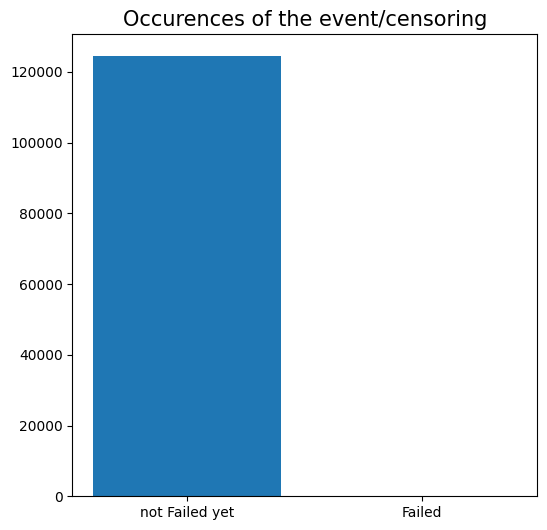

In [ ]:
# failure column
Visualize.plot(feature_type='event',feature='failure',dataset=machine_data_rul)

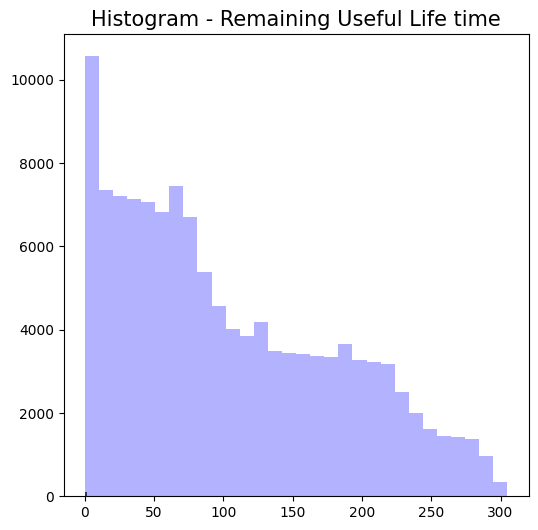

In [ ]:
# rul column
Visualize.plot(feature_type='time',feature='RUL',dataset=machine_data_rul)

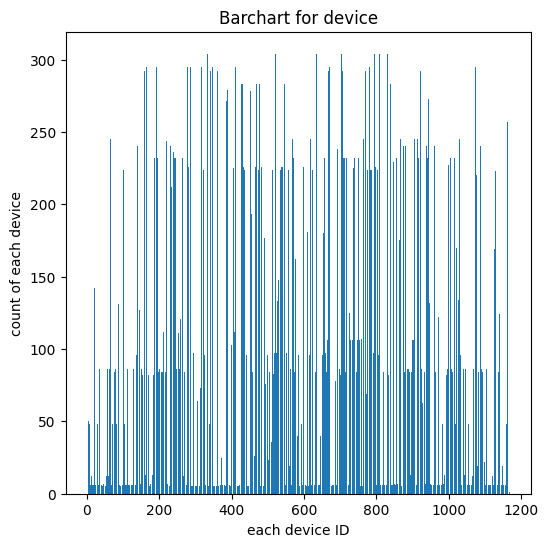

In [ ]:
# visualize
cats = ['device']
nums = ['metric1','metric2','metric3','metric4','metric5','metric6','metric7','metric8','metric9']

for feature in cats:
    Visualize.plot(feature=feature,feature_type='Categorical',dataset=machine_data_rul)

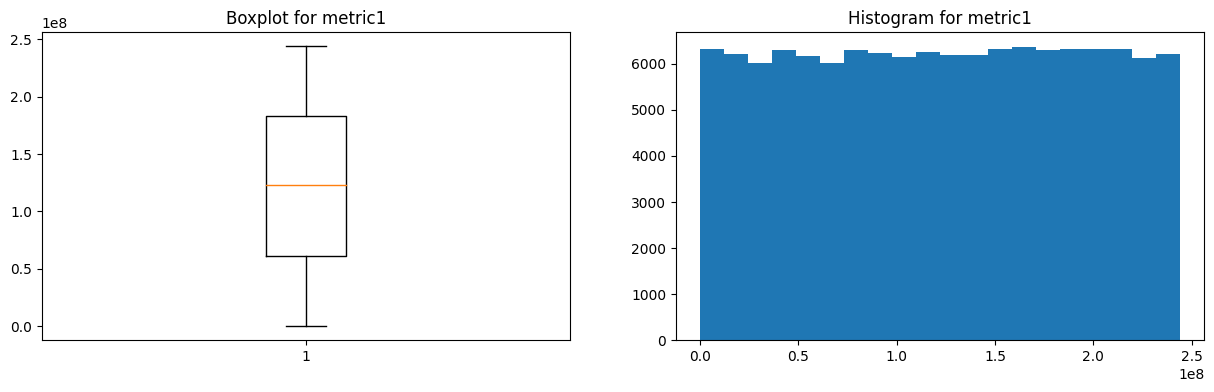

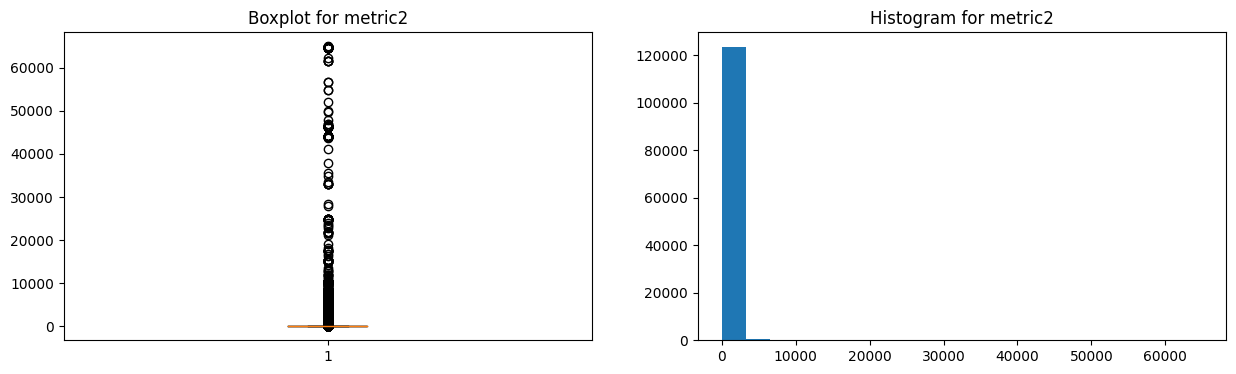

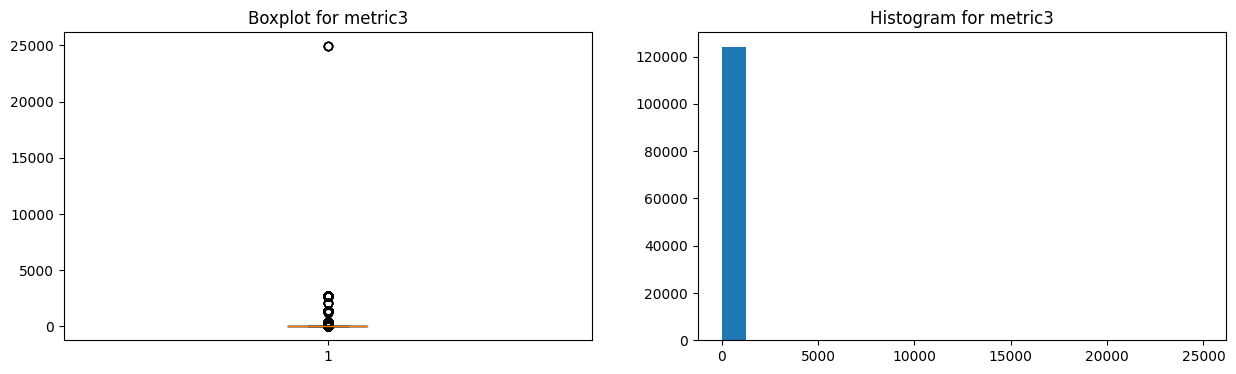

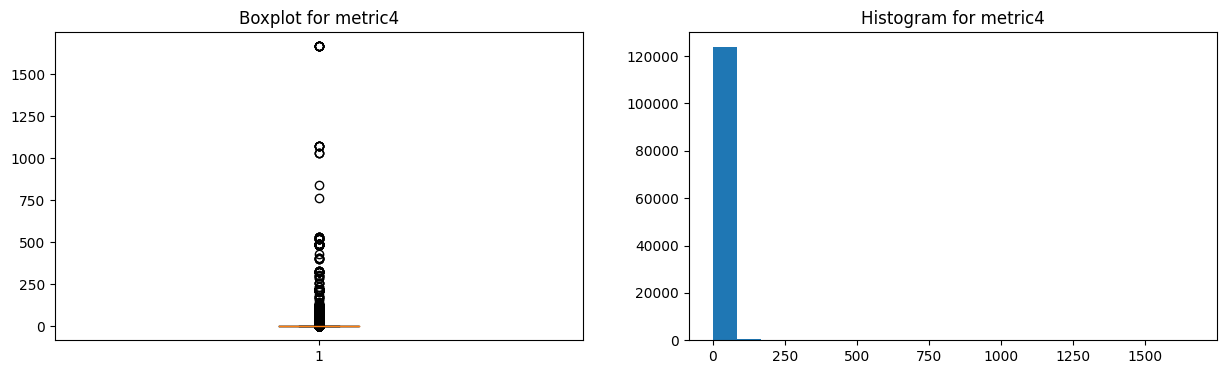

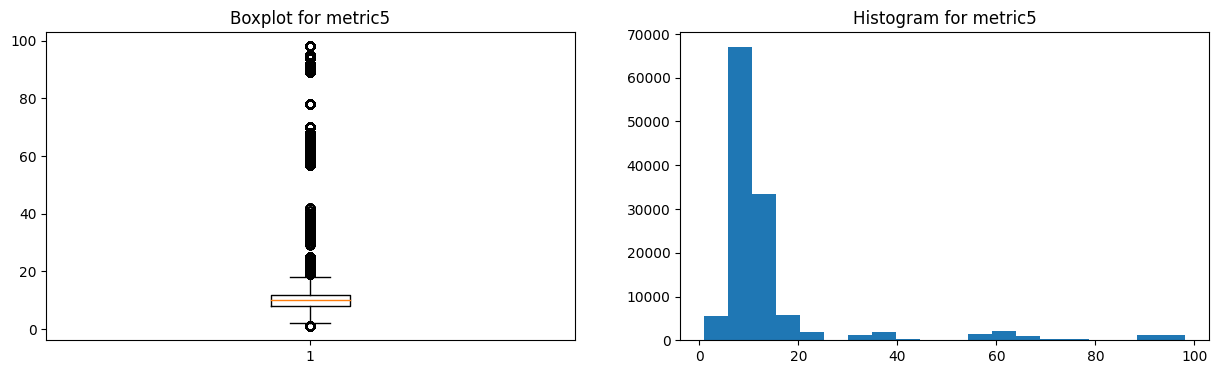

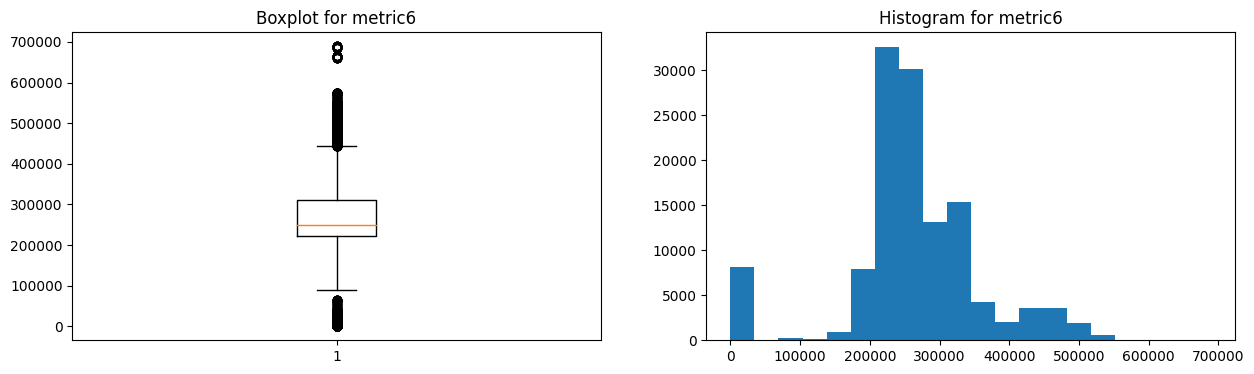

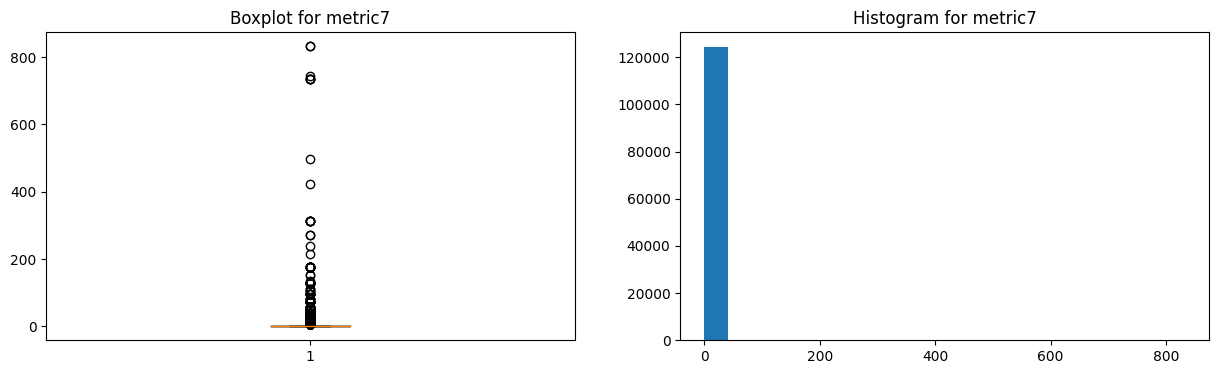

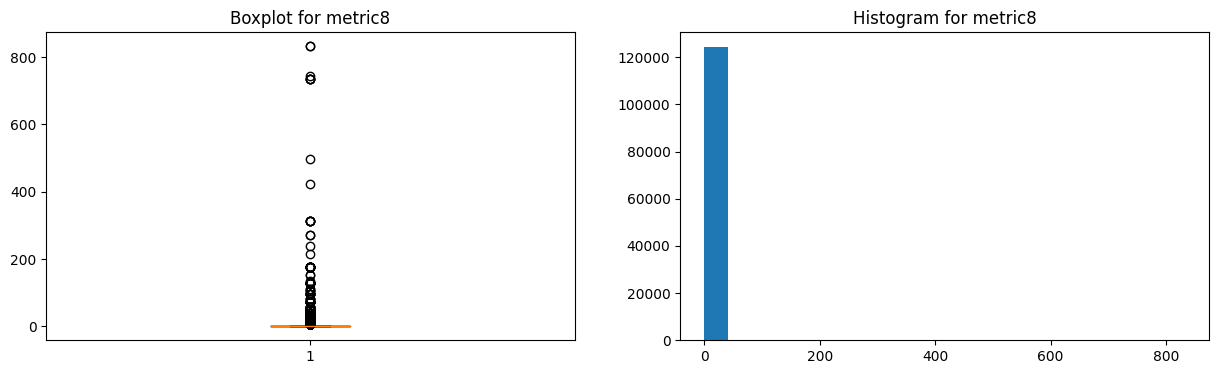

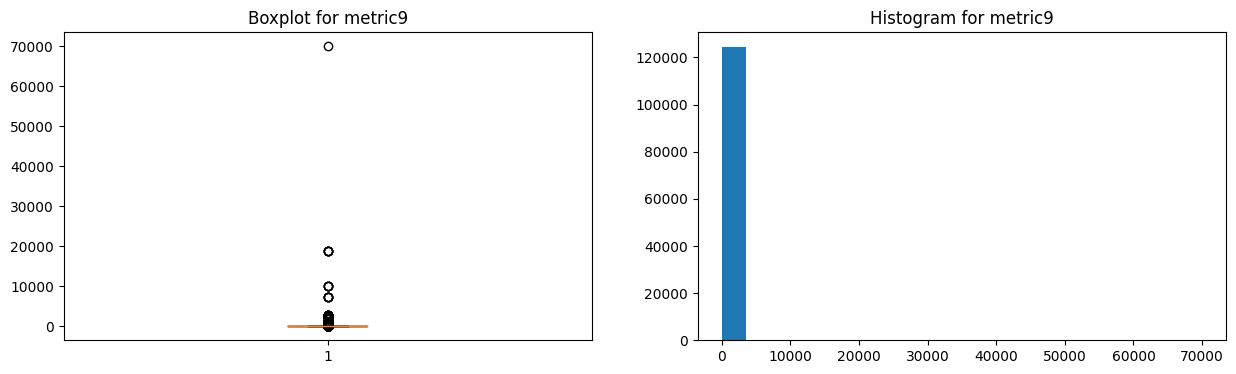

In [ ]:
for feature in nums:
    Visualize.plot(feature=feature,feature_type='Numerical',dataset=machine_data_rul)

In [ ]:
# there are too many outliers and data is not normally distributed

# Modeling

In [ ]:
# Build training and testing sets
"""
machine_data_rul.sort_values(by ='device',inplace=True)
last_index = machine_data_rul.loc[machine_data_rul['device'] == 1000].index.max()
"""

"\nmachine_data_rul.sort_values(by ='device',inplace=True)\nlast_index = machine_data_rul.loc[machine_data_rul['device'] == 1000].index.max()\n"

In [ ]:
# defining rul time and failure event columns
rul_time = 'RUL'
failure_event = 'failure'

# define features
features = np.setdiff1d(machine_data_rul.columns, ['RUL', 'failure','date']).tolist()
print(features,rul_time,failure_event)

['device', 'metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 'metric7', 'metric8', 'metric9'] RUL failure


In [ ]:
# Model.build_test_train(dataset_df = machine_data_rul,test_size=0.4)

train_test_split() got an unexpected keyword argument 'test_size'


In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()